## Simulation und Modellierung WS16/17
### Uebung 08

Schauen Sie sich den folgenden Code an, und versuchen Sie zu verstehen, was dieser macht :

In [1]:
import numpy as np
s2 = 0.1 # Varianz der random walks
m = 0.01 # Mittelwert der random walks

Nn = np.array([1, 10, 50, 100, 500, 1000]) # Zeiten, nach denen Ort des Teilchens gespeichert wird
Nmax=int(max(Nn))

# Speicherort fuer Orte der Teilchen
f = open('single_particle_random_walks.dat','w')

#Kopf des Dokuments
f.write('#200 single particle positions at {:1d} different time steps\n'.format(len(Nn)))
f.write('# nr. x(n) for n=')
for n in Nn :
    f.write(str(n)+" ")
f.write("\n#\n")

# run random walk for 200 particle, save only at times Nn
for nr in range(200) :
    f.write(str(nr)+" ") # number of particle
    x = np.cumsum( (np.random.rand(Nmax)-0.5) * np.sqrt(s2) + m )
    for n in Nn :
        f.write("{:10.5f} ".format(x[n-1]))
    f.write("\n")
    
f.close()

Fuehren Sie den Code aus, und schauen sich den Inhalt der Datei `single_particle_random_walks.dat` an. Laden Sie sich die Daten in ein `numpy` Array

In [2]:
data = np.loadtxt("single_particle_random_walks.dat")
print(np.shape(data))

(200, 7)


- Plotten Sie alle Trajektorien x(n) in ein Diagramm (eine Zeile der Tabelle ist eine Trajektorie)
- Plotten Sie zu jeder Spalte von x-Werten ein Histogramm der Wahrscheinlichkeitsdichte. 
- Plotten Sie die Mittelwerte der Spalten x(n) als Funktion von n mit Fehlerbalken der Laenge einer Standardabweichung.
- Plotten Sie die Standardabweichung als Funktion von n und versuchen Sie durch geeignete Skalierung der Koordinatenaxen herauszubekommen, welcher funktionale Zusammenhang besteht.

Beschriften Sie die Achsen der Plots.

<IPython.core.display.Javascript object>


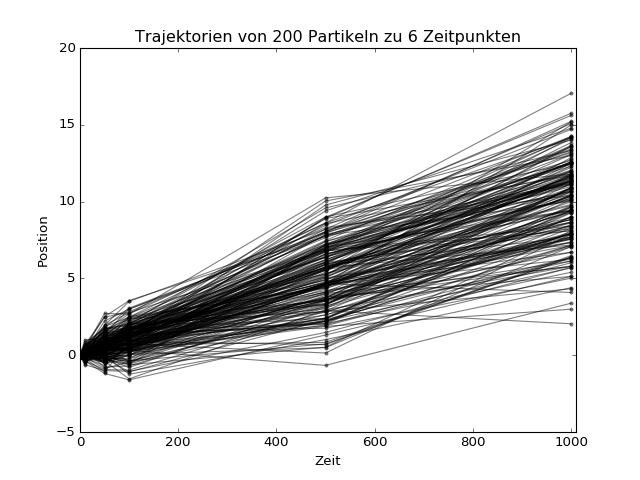

<IPython.core.display.Javascript object>


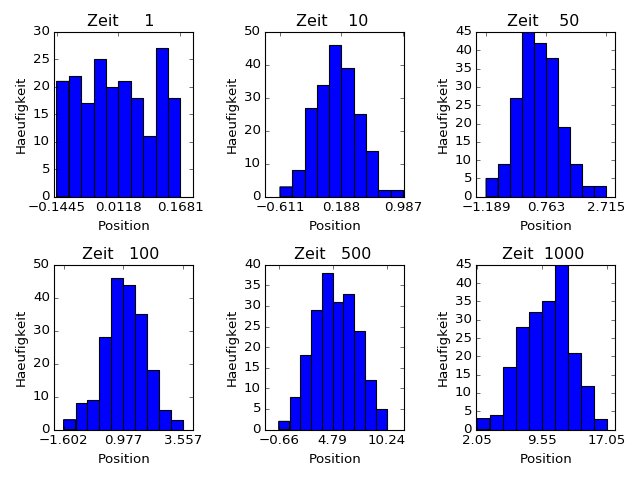

<IPython.core.display.Javascript object>


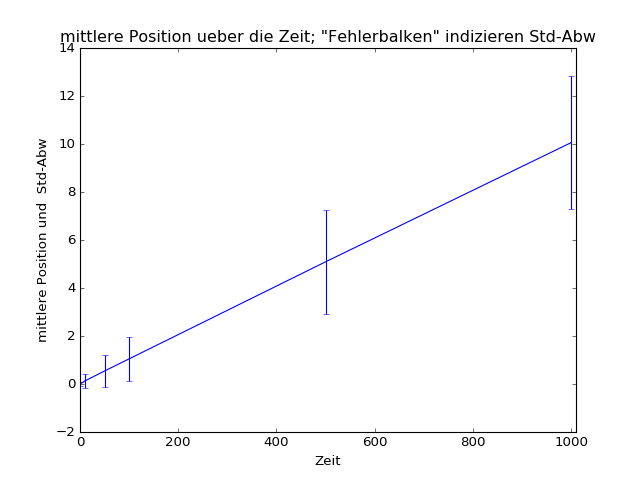

<IPython.core.display.Javascript object>


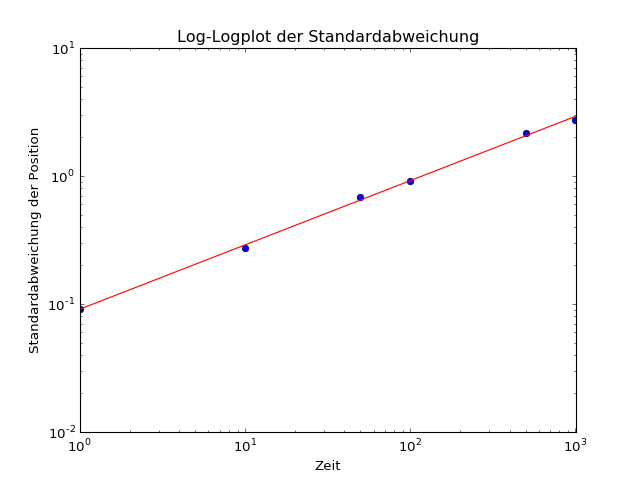

Die gerade hat Anstieg 0.5018 und und Schnittpunkt mit der y-Achse bei 0.0912.


<IPython.core.display.Javascript object>


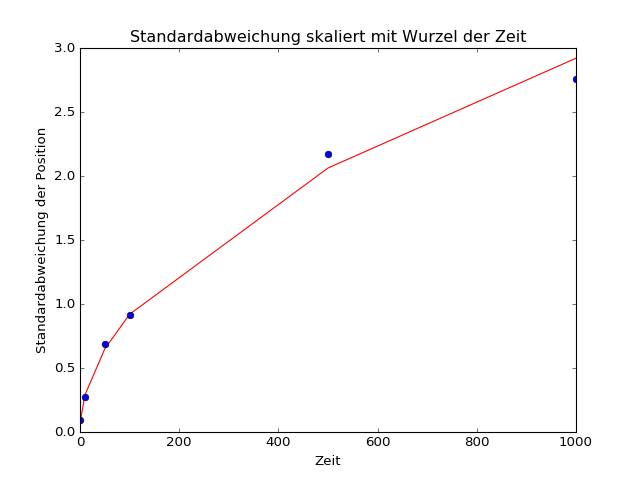

In [3]:
%matplotlib notebook
from pylab import *

pdata = data[:,1:] # pure data, cut first column with particle numbers

#Plotten Sie alle Trajektorien x(n) in ein Diagramm (eine Zeile der Tabelle ist eine Trajektorie)
f0, ax0 = plt.subplots()
ax0.plot(Nn, pdata.T, '.-', color=(0,0,0,0.5)) # semitransparente schwarze Linien
ax0.set_xlim([0,Nmax+10])
ax0.set_title('Trajektorien von 200 Partikeln zu 6 Zeitpunkten')
ax0.set_xlabel('Zeit')
ax0.set_ylabel('Position')


#Plotten Sie zu jeder Spalte von x-Werten ein Histogramm der Wahrscheinlichkeitsdichte. 
f1, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
axen = [ax1, ax2, ax3, ax4, ax5, ax6]
#Beschriftungen:
for ax in axen:
    i = axen.index(ax)
    ax.hist(data[:,i+1]) # in der ersten Spalte wird nur durchnummeriert, deshalb i+1
    ax.set_xlabel('Position')
    ax.set_ylabel('Haeufigkeit')
    ax.set_title("Zeit {:5.0f} ".format(Nn[i]))
    ax.set_xticks(np.linspace(min(data[:,i+1]), max(data[:,i+1]), 3)) # legt Striche an x-Achse fest
plt.tight_layout() # passt pots mit Beschrifungen gut ein
    
    
#Plotten Sie die Mittelwerte der Spalten x(n) als Funktion von n mit Fehlerbalken 
#der Laenge einer Standardabweichung.
f2, ax7 = plt.subplots()
plt.xlim([0,Nmax+10])
means = mean(pdata, axis = 0) #pdata, damit nicht ueber Teilchennummer gemittelt wird
stds = std(pdata, axis = 0)   #pdata, damit nicht ueber Teilchennummer gemittelt wird
ax7.errorbar(Nn, means, yerr=stds)
ax7.set_title('mittlere Position ueber die Zeit; "Fehlerbalken" indizieren Std-Abw')
ax7.set_xlabel('Zeit')
ax7.set_ylabel('mittlere Position und  Std-Abw')


#Plotten Sie die Standardabweichung als Funktion von n und versuchen Sie durch geeignete Skalierung 
#der Koordinatenaxen herauszubekommen, welcher funktionale Zusammenhang besteht.    
f3, ax8 = plt.subplots()
ax8.loglog(Nn, stds, "o")
a = polyfit(np.log10(Nn), np.log10(stds), 1) # fitte die Gerade im loglog-plot
print('Die gerade hat Anstieg {:.4f} und und Schnittpunkt mit der y-Achse bei {:.4f}.'.format(a[0],10**a[1]))
ax8.loglog(Nn, np.power(10, a[1]) * np.power(Nn, a[0]), 'r') # plotte fitgerade mit hinein
ax8.set_xlim([0,Nmax+10])
ax8.set_title('Log-Logplot der Standardabweichung')
ax8.set_xlabel('Zeit')
ax8.set_ylabel('Standardabweichung der Position')


f4, ax9 = plt.subplots()
ax9.plot(Nn, np.power(10, a[1]) * np.power(Nn, a[0]), 'r')
ax9.plot(Nn, stds, "o")
ax9.set_title('Standardabweichung skaliert mit Wurzel der Zeit')
ax9.set_xlabel('Zeit')
ax9.set_ylabel('Standardabweichung der Position')

plt.show()


#errorbar(...)
#plot(...) semilogx(...) semilogy(...) loglog(...) ?